In [1]:
# This computes the IMSRG(2) ground state energy for He3

In [2]:
import sys, os, pathlib
sys.path.append(str(pathlib.Path(os.path.abspath('')) / ".."))

In [3]:
import NuLattice.lattice as lat
import NuLattice.references as ref

from NuLattice.IMSRG import normal_ordering
from NuLattice.IMSRG import ode_solver

In [4]:
# Lattice params
L = 2
a_lat = 2.5
phys_unit = lat.phys_unit(a_lat)

# Lattice basis
basis = lat.get_sp_basis(L)
lattice = lat.get_lattice(L)

In [5]:
# Couplings
vT1 = -9.0
vS1 = vT1
D = 6.0

# Kinetic energy and potential matrix elements
kin = lat.Tkin(lattice, L)
contact_nn = lat.contacts(vT1, vS1, lattice, L)
contact_3n = lat.NNNcontact(D, lattice, L)

In [6]:
# Reference state and occupations
he3_ref = ref.ref_3He_gs
occs = normal_ordering.create_occupations(basis, he3_ref)

In [7]:
# Normal ordered Hamiltonian
e0, f, gamma = normal_ordering.compute_normal_ordered_hamiltonian_no2b(
    occs, kin, contact_nn, contact_3n
)

In [8]:
# IMSRG(2) solution
# eta_criterion specifies when the calculation is considered converged, at which point we set the derivative to 0.0
e_imsrg, integration_data = ode_solver.solve_imsrg2(occs, e0, f, gamma, s_max=100, eta_criterion=1e-3)

s =    0.00000, E =      -3.00000, ||gen1|| =      0.68253600, ||gen2|| =      0.00000000
s =    0.01180, E =      -3.06834, ||gen1|| =      0.67369267, ||gen2|| =      0.00000000
s =    0.00115, E =      -3.00666, ||gen1|| =      0.68167216, ||gen2|| =      0.00000000
s =    0.00173, E =      -3.00998, ||gen1|| =      0.68124149, ||gen2|| =      0.00000020
s =    0.00460, E =      -3.02653, ||gen1|| =      0.67909044, ||gen2|| =      0.00000141
s =    0.00511, E =      -3.02947, ||gen1|| =      0.67870886, ||gen2|| =      0.00000173
s =    0.00575, E =      -3.03313, ||gen1|| =      0.67823227, ||gen2|| =      0.00000219
s =    0.00575, E =      -3.03313, ||gen1|| =      0.67823231, ||gen2|| =      0.00000220
s =    0.01726, E =      -3.09899, ||gen1|| =      0.66967179, ||gen2|| =      0.00001096
s =    0.02302, E =      -3.13017, ||gen1|| =      0.66551418, ||gen2|| =      0.00003449
s =    0.05178, E =      -3.28462, ||gen1|| =      0.64492674, ||gen2|| =      0.00016070
s =    0.0

In [9]:
print("E_IMSRG = {:>12.5f} (lattice units), {:>13.4f} MeV".format(e_imsrg, e_imsrg * phys_unit))

E_IMSRG =     -6.00393 (lattice units),      -19.9191 MeV


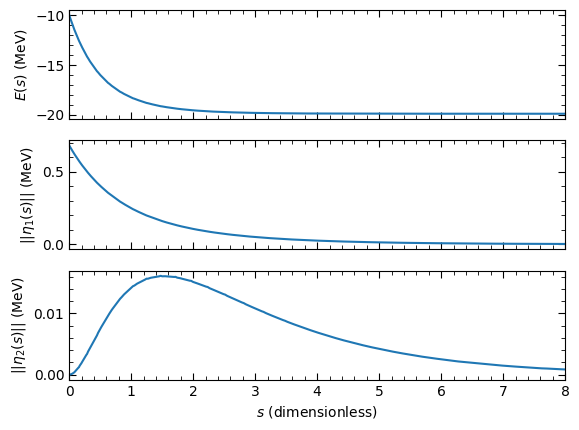

In [10]:
import matplotlib.pyplot as plt
import matplotlib

# Process integration data
s_vals = [x[0] for x in integration_data]
e_vals = [x[1] * phys_unit for x in integration_data]
gen1_vals = [x[2] for x in integration_data]
gen2_vals = [x[3] for x in integration_data]

# Create plot
fig, axs = plt.subplots(
    3, 1, sharex=True
)
ax1, ax2, ax3 = axs
for ax in [ax1, ax2, ax3]:
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
    ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
    ax.tick_params(axis="x", which="both", direction="in")
    ax.tick_params(axis="y", which="both", direction="in")
    ax.tick_params(which="major", length=5)
    ax.tick_params(which="minor", length=3)
ax1.plot(s_vals, e_vals)
ax2.plot(s_vals, gen1_vals)
ax3.plot(s_vals, gen2_vals)
ax3.set_xlabel("$s$ (dimensionless)")
ax1.set_ylabel("$E(s)$ (MeV)")
ax2.set_ylabel(r"$||\eta_1(s)||$ (MeV)")
ax3.set_ylabel(r"$||\eta_2(s)||$ (MeV)")
ax1.set_xlim(0, 8)
plt.show()